In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

# Load the CSV file (Replace with your file path)
data = pd.read_csv(r"C:\Users\owenl\Downloads\finalData.csv") 

# Convert Bankruptcy to categorical
data['Bankrupt?'] = data['Bankrupt?'].astype('category')



# Random Forest Classifier

## 0.Base Random Forest Classifier without modifications

=== Metrics ===
Precision (v0): 0.000
Recall (v0): 0.000
AUC-PR (v0): 0.122


c:\Users\Owen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x500 with 0 Axes>

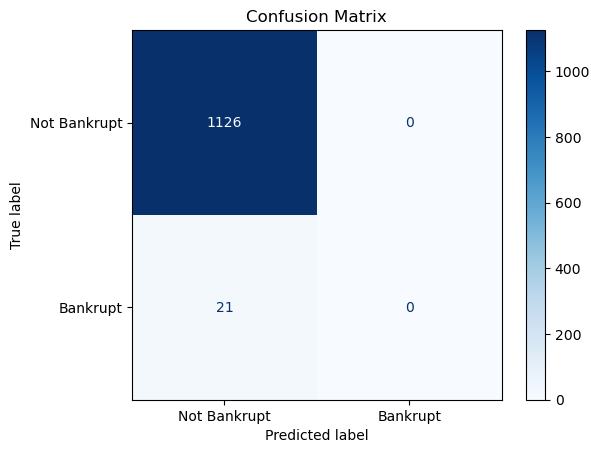

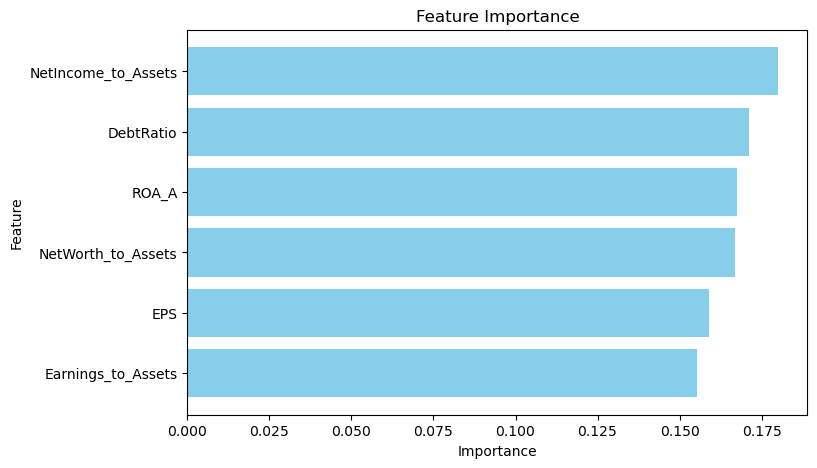

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt


# Split into features and target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


# Calculate specified metrics
precision_v0 = precision_score(y_test, y_pred)
recall_v0 = recall_score(y_test, y_pred)
auc_pr_v0= average_precision_score(y_test, y_proba)

# Print specified metrics
print(f"=== Metrics ===")
print(f"Precision (v0): {precision_v0:.3f}")
print(f"Recall (v0): {recall_v0:.3f}")
print(f"AUC-PR (v0): {auc_pr_v0:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Not Bankrupt", "Bankrupt"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'].head(10)[::-1], feature_importances['Importance'].head(10)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Although the base model has a high accuracy, it is deceiving since it does not account for the highly imbalanced dataset and the poor sampling. To improve it we introduce SMOTE and Class Weights to deal with the imbalance.

## With the use of SMOTE-ENN and class weights to deal with the imbalance.

Due to the highly imbalanced nature of our dataset, we opted to use both SMOTE-EEN and class weight to deal with the imbalance and improve our model.


##  1.Random Forest Classifier with SMOTE-ENN

=== Metrics ===
Precision (v1): 0.077
Recall (v1): 0.524
AUC-PR (v1): 0.088


<Figure size 600x500 with 0 Axes>

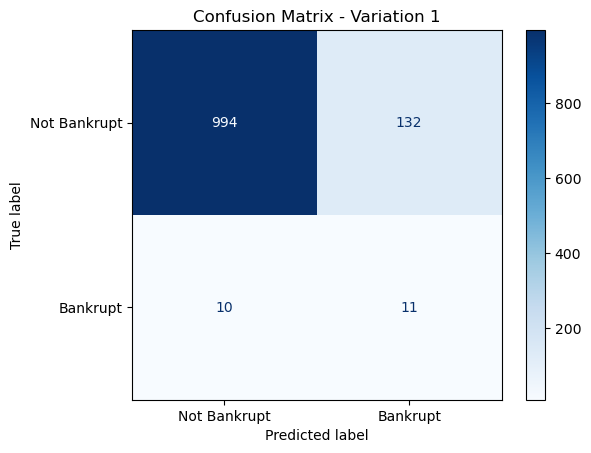

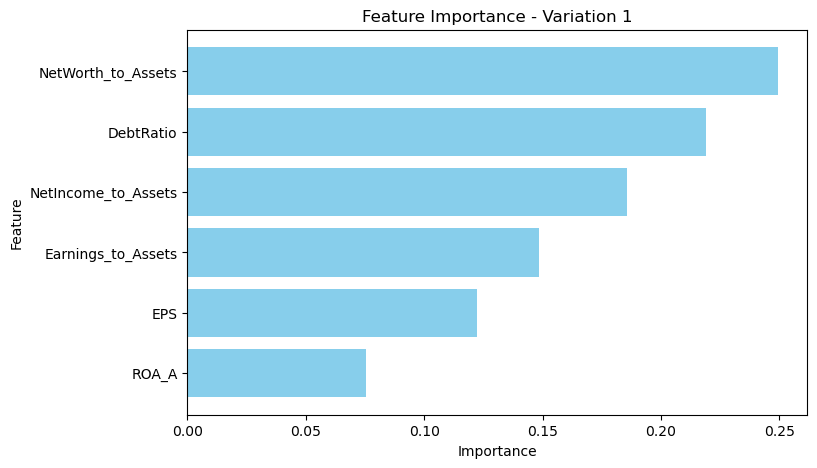

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt



# Split into features and target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to address class imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate specified metrics
precision_v1 = precision_score(y_test, y_pred)
recall_v1 = recall_score(y_test, y_pred)
auc_pr_v1= average_precision_score(y_test, y_proba)

# Print specified metrics
print(f"=== Metrics ===")
print(f"Precision (v1): {precision_v1:.3f}")
print(f"Recall (v1): {recall_v1:.3f}")
print(f"AUC-PR (v1): {auc_pr_v1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Not Bankrupt", "Bankrupt"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Variation 1')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'].head(10)[::-1], feature_importances['Importance'].head(10)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Variation 1')
plt.show()

##  2.Random Forest Classifier with SMOTE-ENN and class weighting

=== Metrics ===
Precision: 0.073
Recall: 0.524
AUC-PR: 0.085


<Figure size 600x500 with 0 Axes>

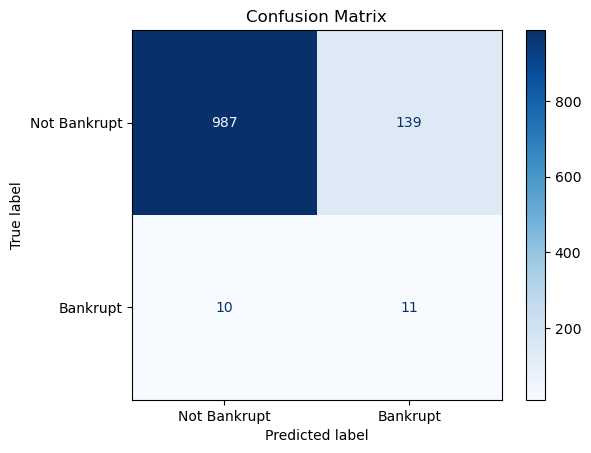

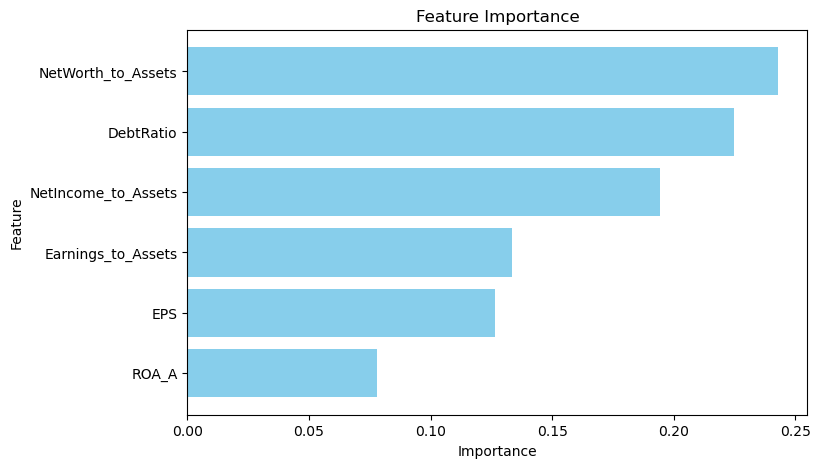

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt



# Split into features and target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to address class imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier with class weighting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate specified metrics
precision_v2 = precision_score(y_test, y_pred)
recall_v2 = recall_score(y_test, y_pred)
auc_pr_v2 = average_precision_score(y_test, y_proba)

# Print specified metrics
print(f"=== Metrics ===")
print(f"Precision (v2): {precision_v2:.3f}")
print(f"Recall (v2): {recall_v2:.3f}")
print(f"AUC-PR (v2): {auc_pr_v2:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Not Bankrupt", "Bankrupt"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Variation 2')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'].head(10)[::-1], feature_importances['Importance'].head(10)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Variation 2')
plt.show()

## We included threshold tuning to try to refine our model

1.Better identify the minority class
2.Reduce false negatives
3.Achieve a balance that reflects the true cost of misclassification

## 3.Random Forest with SMOTEENN, Class Weighting, and Threshold Tuning (Precision-Recall Curve)


=== Metrics ===
Precision (v3): 0.114
Recall (v3): 0.381
AUC-PR (v3): 0.085


<Figure size 600x500 with 0 Axes>

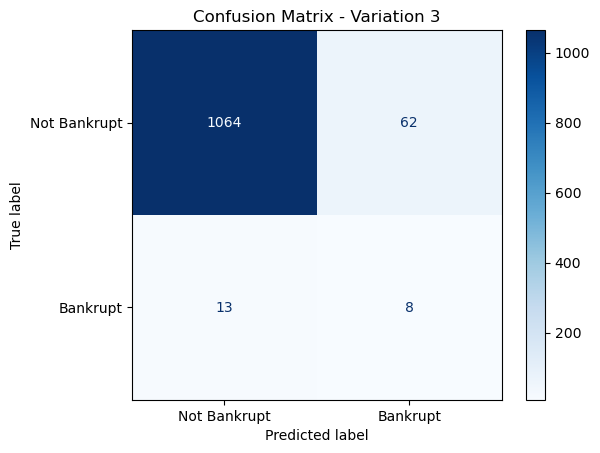

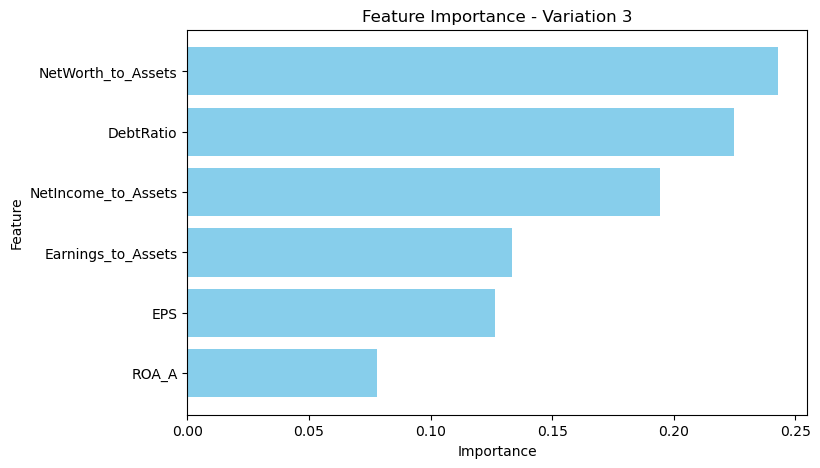

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt



# Split into features and target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to address class imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier with class weighting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

# Get predicted probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# Find optimal threshold using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
fscore = (2 * precision * recall) / (precision + recall)
optimal_idx = np.argmax(fscore)
optimal_threshold = thresholds[optimal_idx]

# Make predictions with optimal threshold
y_pred = (y_proba >= optimal_threshold).astype(int)


# Calculate specified metrics
precision_v3 = precision_score(y_test, y_pred)
recall_v3 = recall_score(y_test, y_pred)
auc_pr_v3 = average_precision_score(y_test, y_proba)

# Print specified metrics
print(f"=== Metrics ===")
print(f"Precision (v3): {precision_v3:.3f}")
print(f"Recall (v3): {recall_v3:.3f}")
print(f"AUC-PR (v3): {auc_pr_v3:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Not Bankrupt", "Bankrupt"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Variation 3')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'].head(10)[::-1], feature_importances['Importance'].head(10)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Variation 3')
plt.show()

## 4.Random Forest with SMOTEENN, Class Weighting, and Threshold Tuning (Youden's J statistic )



Optimal threshold: 0.300
=== Metrics ===
Precision (v4): 0.073
Recall (v4): 0.762
AUC-PR (v4): 0.085


<Figure size 600x500 with 0 Axes>

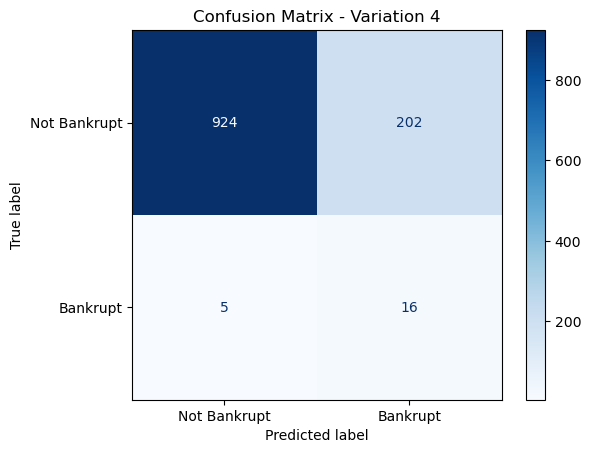

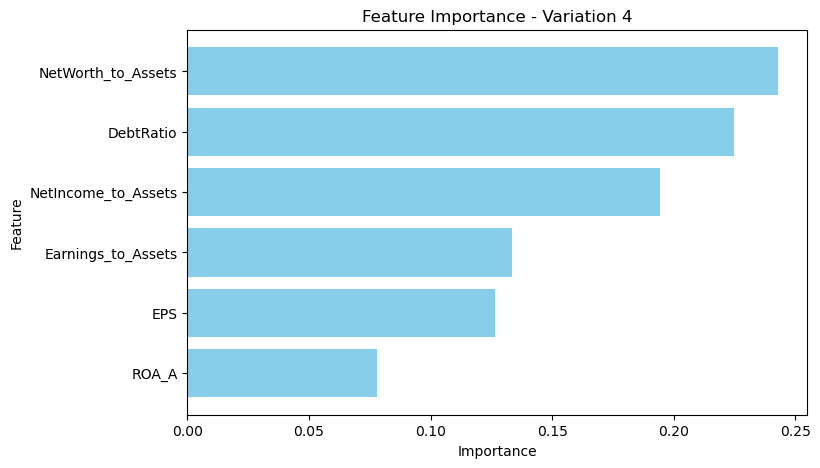

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, average_precision_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt



# Split into features and target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to address class imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize Random Forest classifier with class weighting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

# Get predicted probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# Find optimal threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal threshold: {optimal_threshold:.3f}")

# Apply optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate specified metrics
precision_v4 = precision_score(y_test, y_pred_optimal)
recall_v4 = recall_score(y_test, y_pred_optimal)
auc_pr_v4 = average_precision_score(y_test, y_proba)

# Print specified metrics
print(f"=== Metrics ===")
print(f"Precision (v4): {precision_v4:.3f}")
print(f"Recall (v4): {recall_v4:.3f}")
print(f"AUC-PR (v4): {auc_pr_v4:.3f}")

cm = confusion_matrix(y_test, y_pred_optimal)
labels = ["Not Bankrupt", "Bankrupt"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Variation 4')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'].head(10)[::-1], feature_importances['Importance'].head(10)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Variation 4')
plt.show()

## Comparison of metrics. Precision & Recall, AUC-PR

In [ ]:
# Create a comparison table for Precision, Recall, and AUC-PR
comparison = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'AUC-PR'],
    'Baseline': [precision_v0, recall_v0, auc_pr_v0],
    'Variation 1': [precision_v1, recall_v1, auc_pr_v1],
    'Variation 2': [precision_v2, recall_v2, auc_pr_v2],
    'Variation 3': [precision_v3, recall_v3, auc_pr_v3],
    'Variation 4': [precision_v4, recall_v4, auc_pr_v4]
})

print("\n=== Performance Comparison Across Variations ===")
print(comparison)


=== Performance Comparison Across Variations ===
      Metric  Baseline  Variation 1  Variation 2  Variation 3  Variation 4
0  Precision  0.000000     0.076923     0.073333     0.114286     0.073394
1     Recall  0.000000     0.523810     0.523810     0.380952     0.761905
2     AUC-PR  0.122458     0.087609     0.085077     0.085077     0.085077


For a highly imbalanced dataset (e.g., bankruptcy prediction), Variation 4 (Random Forest with SMOTEENN, Class Weighting, and Threshold Tuning (Youden's J statistic )
) is the best choice. 


We focus on Recall,Precision and AUC-PR as we have a highly imbalanced dataset. Variation produces the best results as seen below.

Recall:	0.762	Highest ability to detect actual bankruptcies (minimizes false negatives). Critical for avoiding missed cases.

Precision:	0.073	Low, but expected in imbalance. Prioritize recall over precision here.

AUC-PR:	0.085	Similar to other variations; not a decisive factor.

Why Variation 4?
Recall is critical: In imbalanced scenarios like bankruptcy prediction, missing a positive case (false negative) is often costlier than a false alarm (false positive).

Trade-off: Variation 4 sacrifices precision to maximize recall, which aligns with the goal of identifying as many bankruptcies as possible.

## Conclusion

Variation 4 (Random Forest with SMOTEENN, Class Weighting, and Threshold Tuning (Youden's J statistic )) is the best variation of Random Forest Classifier.
